In [1445]:
## Setting parameters

random_state = 10

address = './data.csv'

## Importing Data, Packages, and Functions

In [1446]:
# Packages
import pandas as pd
import numpy as np
from scipy import stats
import re

import warnings
warnings.filterwarnings("ignore")


## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context = 'notebook' , style = 'whitegrid' , palette = 'Set2')
%matplotlib inline

## Filling nan
from sklearn.impute import SimpleImputer

## Encoding Part

import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

### ML Part

from sklearn.model_selection import train_test_split, GridSearchCV

## Feature selection and scaling part

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, VarianceThreshold
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.feature_selection import SequentialFeatureSelector

## Model for classification

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

## Classification Evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


## Model for regression

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

## Regression Evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Imbalace Data

from imblearn.over_sampling import SMOTE, RandomOverSampler

### Get Data

In [1447]:
df=pd.read_csv(address).drop(columns=['Unnamed: 0'])
# df.head()

#### Take a Quick Look at the Data Structure

In [1448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2651 non-null   object 
 1   brand             2651 non-null   object 
 2   2G                2651 non-null   bool   
 3   3G                2651 non-null   bool   
 4   4G                2651 non-null   bool   
 5   5G                2651 non-null   bool   
 6   Announced         2651 non-null   float64
 7   Status            2651 non-null   object 
 8   Weight            2651 non-null   float64
 9   Length            2651 non-null   object 
 10  Width             2651 non-null   object 
 11  Diameter          2651 non-null   object 
 12  SIM               2651 non-null   object 
 13  Display Type      2651 non-null   object 
 14  Display Size      2651 non-null   float64
 15  ppi               2651 non-null   float64
 16  body ratio        2651 non-null   float64


In [1449]:
df.describe()

,Announced,Weight,Display Size,ppi,body ratio,battery_capacity,Price,CPU,pixel,RAM,Storage
count,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2372.000000,2.651000e+03,2651.000000,2651.000000
mean,2016.577518,190.389325,5.759838,312.312335,71.775556,3385.437948,242.896775,5.847808,1.576779e+06,2.901974,46.621613
std,3.656827,97.208564,1.628346,101.907171,11.262514,1627.512406,193.726059,2.372880,1.181280e+06,2.493559,60.823522
min,2010.000000,89.300000,2.200000,121.000000,25.500000,50.000000,20.000000,2.000000,7.680000e+04,0.062500,0.039062
25%,2014.000000,140.100000,4.700000,233.000000,64.650000,2070.000000,130.000000,4.000000,5.184000e+05,1.000000,8.000000
50%,2016.000000,167.000000,5.500000,288.000000,71.400000,3000.000000,190.000000,8.000000,1.094400e+06,2.000000,16.000000
75%,2020.000000,195.000000,6.530000,400.000000,81.800000,4500.000000,290.000000,8.000000,2.527200e+06,4.000000,64.000000
max,2024.000000,950.000000,14.600000,807.000000,94.100000,11560.000000,2000.000000,10.000000,8.294400e+06,16.000000,512.000000


### Required Functions 

In [1450]:
#### Proccessing some Features

def extract_display_type(input_string):

    input_string = re.sub(r'LCD[2356]', 'LCD', input_string)
    input_string = re.sub(r'S-LCD|SLCD', 'Super LCD', input_string)
    input_string = re.sub(r'S-IPS|SIPS', 'Super IPS', input_string)
    input_string = re.sub(r' or [^)]*', '', input_string)
    input_string = re.sub(r'Super clear |SC-', 'Super Clear ', input_string)
    input_string = re.sub(r'HD IPS\+|HD IPS \+|HD-IPS \+|HD IPS Plus', 'IPS', input_string)
    input_string = re.sub(r'TFT  LCD', 'TFT LCD', input_string)
    input_string = re.sub(r'IPS\+', 'IPS', input_string)
    input_string = re.sub(r'[^)]*IPS LCD', 'IPS LCD', input_string)
    input_string = re.sub(r'P-OLED', 'OLED', input_string)
    input_string = re.sub(r'True |Samsung |Plus| LTPO|LTPO2|LTPO | resistive touchscreen|2X|-NEO| XDR|Clear |3D|-backlit|Foldable |Curved |Flexible ', '', input_string)
    input_string = re.sub(r'Super Retina|Dynamic', '', input_string)

 
    input_string = input_string.split(',')[0].strip()

    if input_string in ['Super IPS', 'IPS']:
        input_string = 'IPS LCD'
    if input_string in ['TN TFT LCD', 'TFT']:
        input_string = 'TFT LCD'
    if input_string in ['TN', 'TDDI', 'LED LCD', 'PLS', 'PLS LCD', 'Liquid Retina mini-LED LCD']:
        input_string='LCD'
    if input_string in ['Super AMOLED', 'AMOLED']:
        input_string='AMOLED'


    return input_string
# Sensors
def pre_sensors(x):
       
    if (x == x) & (x !='Yes'):
        x = x.lower()
        parentheses_pattern = r'\(.*?\)'
        dash_pattern= r'-.*?,'
        cleaned_sensors = re.sub(parentheses_pattern, '', x)
        cleaned_sensors = re.sub(dash_pattern, ',', cleaned_sensors)
        cleaned_sensors = re.sub(r'-.*', '', cleaned_sensors)

        cleaned_sensors = cleaned_sensors.replace("fingerprints", "fingerprint")
        cleaned_sensors = cleaned_sensors.replace("fingerprint ", "fingerprint")

        cleaned_sensors = cleaned_sensors.replace("dual fingerprint", "fingerprint")
        cleaned_sensors = cleaned_sensors.replace(" ,", ",")
        cleaned_sensors = cleaned_sensors.replace(", ", ",")
        cleaned_sensors = cleaned_sensors.replace("unspecified sensors", "")
       
        return cleaned_sensors
    return x

# Bluetooth
def pre_bluetooth(x):
        
        result=re.findall(r'(\d+.\d)',x)
        if result:
            return result[0]
        return np.nan

def extract_sensor(input_string):

    
    try:

        input_string = re.sub(r' \([^)]*\)|[/;]|always-on |Infrared |Dual |unspecified sensors| - market dependant', '', input_string)
        input_string = re.sub(r' - North America| - other markets', ',', input_string)
        input_string = re.sub(r'[Cc]ompass', 'compass', input_string)
        input_string = re.sub(r' light| infrared', '', input_string)
        input_string = re.sub(r'Fingerprints', 'Fingerprint', input_string)
        input_string = re.sub(r'[Ff]ingerprint', 'fingerprint', input_string)
        input_string = re.sub(r'[Pp]roximity', 'proximity', input_string)
        input_string = re.sub(r'[Aa]ccelerometer', 'accelerometer', input_string)
        input_string = re.sub(r'gyroscope', 'gyro', input_string)
        input_string = re.sub(r'temperature', 'thermometer', input_string)
        input_string = re.sub(r'recognition', 'ID', input_string)
        input_string = re.sub(r' ID', '-ID', input_string)
        input_string = re.sub(r'proximity ', 'proximity,', input_string)
        
        sensors = input_string.split(',')
        sensors = [sen.strip() for sen in sensors]
        sensors = ','.join(sensors)

        if input_string in ['Unspecified', 'No']:
            sensors = np.nan

    except:
        sensors = np.nan

    return sensors

In [1451]:
#### handling Outliers Functions


def drop_outliers_IQR(df, column_name, fillna=False):
    df = df.copy()
    distance = 1.5 * (np.percentile(df[column_name], 75) - np.percentile(df[column_name], 25))

    if fillna:
        df.loc[df[column_name] > distance + np.percentile(df[column_name], 75), column_name] = distance + np.percentile(df[column_name], 75)
        df.loc[df[column_name] < np.percentile(df[column_name], 25) - distance, column_name] = np.percentile(df[column_name], 25) - distance
    else:
        df.loc[df[column_name] > distance + np.percentile(df[column_name], 75), column_name] = np.nan
        df.loc[df[column_name] < np.percentile(df[column_name], 25) - distance, column_name] = np.nan

    return df[column_name]

def drop_outliers_Zscore(df, column_name, fillna=False):
    df = df.copy()
    threshold = 3
    mean_value = df[column_name].mean()
    std_value = df[column_name].std()

    if fillna:
        df.loc[(df[column_name] <= mean_value - threshold * std_value), column_name] = -threshold * std_value
        df.loc[(df[column_name] >= mean_value + threshold * std_value), column_name] = threshold * std_value
    else:
        df[(df[column_name] <= mean_value - threshold * std_value) | (df[column_name] >= mean_value + threshold * std_value)] = np.nan

    return df[column_name]

In [1452]:
### Preprocessing Whole Dataset

def PreProccess_df(data):

    le = LabelEncoder()
    oe = OneHotEncoder()

    # Network-------------------> map to 1 , 0

    data['2G'] = data['2G'].map({True:1, False:0})
    data['3G'] = data['3G'].map({True:1, False:0})
    data['4G'] = data['4G'].map({True:1, False:0})
    data['5G'] = data['5G'].map({True:1, False:0})
    
    # convert Lenght , Width dtype
    
    data['Length']=data['Length'].apply(lambda x: re.findall(r'[0-9.]{2,7}',x)[0]).astype('float64')
    data['Width']=data['Width'].apply(lambda x: re.findall(r'[0-9.]{2,7}',x)[0]).astype('float64')
    
    # Diameter ---------------> Process and Change dtype
    
    data['Diameter'] = data['Diameter'].apply(lambda col: col.split('-')[0]).astype('float64')
    
    # Display Type ----------------> Change into Types
    
    data['Display Type'] = data['Display Type'].apply(extract_display_type)
    data[sorted(data['Display Type'].unique())] = oe.fit_transform(data['Display Type'].values.reshape(-1, 1)).toarray() # Added part
    
    # OS-----------------> divide into two groups ('OS_Types','OS_version')
    
    data[['OS_Types','OS_version']]=data.OS.str.split(' ',expand=True)
    
    data['OS_Types']=data['OS_Types'].apply(lambda x: 'iOS' if x in ['iOS','iPadOS'] else x)
    data['OS_Types']=data['OS_Types'].apply(lambda x: 'Other_OS' if x not in ['Android','iOS'] else x)
    data['OS_version']=data['OS_version'].apply(lambda x: np.nan if (x=='OS') or (x== None) else x) 

    # data['OS_version'] = data['OS_version'].apply(lambda col: float('.'.join(col.split('.')[-1])) if (type(col) != float and len(col.split('.')) > 1) else float(col))
    data['OS_version'] = data['OS_version'].apply(lambda col: float(col.split('.')[0]) if type(col) != float else float(col))  # Added part
    data[sorted(data.OS_Types.unique())] = oe.fit_transform(data['OS_Types'].values.reshape(-1, 1)).toarray()  # Added part

    data['OS_Types'] = data['OS_Types'].map({'Android':1, 'iOS':2, 'Other_OS': 3})  # Added part

    # WLAN---------------> Preproccess and fill nan with mode value of each brand
    data['WLAN']=data.WLAN.str.split(' ',expand=True)[0].str.split(',',expand=True)[0].apply(lambda x: 'Wi-Fi' if x=='Yes' else x)
    
    # Sensors--------------> Process and fill yes
    
    # data['Sensors']=data.Sensors.apply(pre_sensors)
    
    data['Sensors']=data.Sensors.apply(extract_sensor)
    data['Sensors']= data['Sensors'].apply(lambda x: np.nan if x == 'Yes' else x)
    
    sensors = data['Sensors'].apply(lambda x: x.strip() if x==x else x).str.get_dummies(sep=',')
    data = pd.concat([data, sensors], axis=1)

    # Bluetooth---------> Change into version
    
    data['Bluetooth']=data.Bluetooth.apply(pre_bluetooth).astype(float)
    
    # Card slot ---------------> Change into type
    
    data['Card slot']=data['Card slot'].apply(lambda x: x.split(' ')[0].replace(',',''))
    data['Card slot']=data['Card slot'].apply(lambda x: np.nan if (x=='Unspecified') or (x=='Yes')  else x) ## changed
    data['Card slot']=data['Card slot'].apply(lambda x: np.nan if (x=='microSD') or (x=='SD') else x) ## added part

       
    # Chipset----------------> name of Chipset
     
    data['Chipset']=data.Chipset.str.split(' ',expand=True)[0]
    data['Chipset']=data['Chipset'].apply(lambda x: 'Exynos' if x == '5' else x)
    data['Chipset']=data['Chipset'].apply(lambda x: 'Intel' if x == 'Intel®' else x) # Added part
    
    other_chipsets = data['Chipset'].value_counts()[data['Chipset'].value_counts() <= data['Chipset'].value_counts().median()].index # Added part
    data.loc[data['Chipset'].isin(other_chipsets), 'Chipset'] = 'Other_chipset' # Added part

    #  'Loudspeaker' , '3.5mm jack' -------------> map to 0,1
    data['Loudspeaker'] = data['Loudspeaker'].map({True:1, False:0})
    data['3.5mm jack'] = data['3.5mm jack'].map({True:1, False:0})

    # SIM
    data[sorted(data.SIM.unique())] = oe.fit_transform(data['SIM'].values.reshape(-1, 1)).toarray() # Added part

    # Brand
    data[sorted(data.brand.unique())] = oe.fit_transform(data['brand'].values.reshape(-1, 1)).toarray() # Added part

    # Status
    data['Status'] = data['Status'].map({'Coming':1, 'Available':2, 'Discontinued': 3})  # Added part

    # Ratio
    # data['ratio'] = data['ratio'].apply(lambda col: max(list(map(float, col.split(':'))))/min(list(map(float, col.split(':'))))) # Added part
    data['ratio'] = data['ratio'].map({'16:9':3, '20:9':3, '16:10': 3, '18:9':3, '19:9':3, '21:9':3, '17:9':3,
                                         '5:9':2, '7:9':2, '3:9':2,
                                         '5:3':1, '4:3':1, '3:2':1})  # Added part

    # GPU
    data['GPU'] = data['GPU'].apply(lambda x: x.replace('-',' ').split()[0] if type(x) == str else x)
    other_gpu = data['GPU'].value_counts()[data['GPU'].value_counts() <= data['GPU'].value_counts().median()].index # Added part
    # data.loc[~data['GPU'].isin(['Adreno', 'Mali', 'PowerVR']), 'GPU'] = 'Other_GPU' # Added part
    data.loc[data['GPU'].isin(other_gpu), 'GPU'] = 'Other_GPU' # Added part

    ## drop unwanted columns
    data.drop(['name','Colors','Network','OS','Sensors','Internal', 
               'WLAN'],axis=1,inplace=True)
    
    return data

## Preproccessing Part

In [1453]:
data=df.copy()
data=PreProccess_df(data)
print(data.shape)
# data.info()

(2651, 77)


### Visulization of distribution

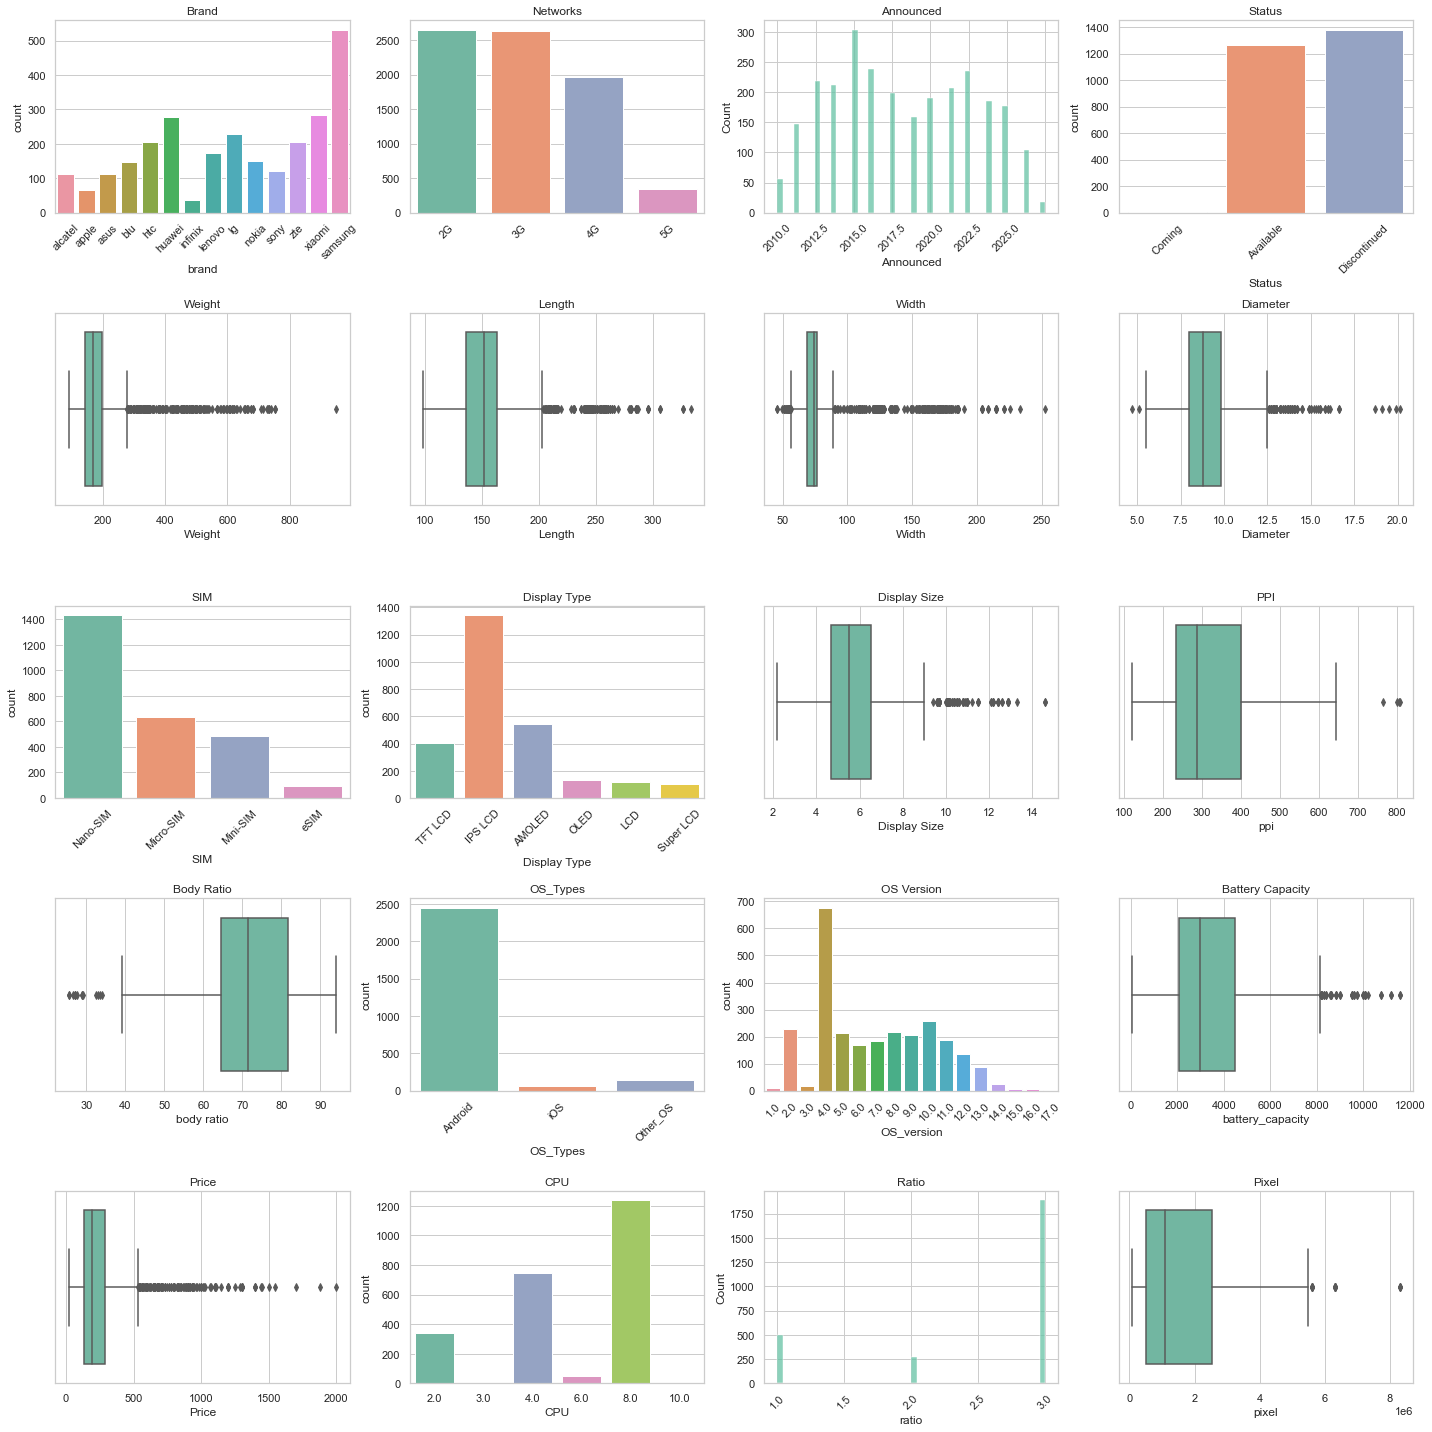

In [1454]:
fig, axs = plt.subplots(5, 4, figsize=(20, 20))

# brand
sns.countplot(data=data, x='brand', ax=axs[0, 0])
axs[0, 0].set_title('Brand')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=45)

# networks
data_net = data[['2G', '3G', '4G', '5G']].sum()
sns.barplot(x=data_net.index, y=data_net.values, ax=axs[0, 1])
axs[0, 1].set_title('Networks')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=45)

# Announced
sns.histplot(data=data, x='Announced', bins=50, ax=axs[0, 2])
axs[0, 2].set_title('Announced')
axs[0, 2].set_xticklabels(axs[0, 2].get_xticklabels(), rotation=45)

# Status
sns.countplot(data=data, x='Status', ax=axs[0, 3])
axs[0, 3].set_title('Status')
axs[0, 3].set_xticklabels(['Coming', 'Available', 'Discontinued'], rotation=45)

# Weight
sns.boxplot(data=data, x='Weight', ax=axs[1, 0])
axs[1, 0].set_title('Weight')

# Length
sns.boxplot(data=data, x='Length', ax=axs[1, 1])
axs[1, 1].set_title('Length')

# Width
sns.boxplot(data=data, x='Width', ax=axs[1, 2])
axs[1, 2].set_title('Width')

# Diameter
sns.boxplot(data=data, x='Diameter', ax=axs[1, 3])
axs[1, 3].set_title('Diameter')

# SIM
sns.countplot(data=data, x='SIM', ax=axs[2, 0])
axs[2, 0].set_title('SIM')
axs[2, 0].set_xticklabels(axs[2, 0].get_xticklabels(), rotation=45)

# Display Type
sns.countplot(data=data, x='Display Type', ax=axs[2, 1])
axs[2, 1].set_title('Display Type')
axs[2, 1].set_xticklabels(axs[2, 1].get_xticklabels(), rotation=45)

# Display Size
sns.boxplot(data=data, x='Display Size', ax=axs[2, 2])
axs[2, 2].set_title('Display Size')

# ppi
sns.boxplot(data=data, x='ppi', ax=axs[2, 3])
axs[2, 3].set_title('PPI')

# body ratio
sns.boxplot(data=data, x='body ratio', ax=axs[3, 0])
axs[3, 0].set_title('Body Ratio')

# OS
sns.countplot(data=data, x='OS_Types', ax=axs[3, 1])
axs[3, 1].set_title('OS_Types')
axs[3, 1].set_xticklabels(['Android', 'iOS', 'Other_OS'], rotation=45)

# OS version
sns.countplot(data=data, x='OS_version', ax=axs[3, 2])
axs[3, 2].set_title('OS Version')
axs[3, 2].set_xticklabels(axs[3, 2].get_xticklabels(), rotation=45)

# battery capacity
sns.boxplot(data=data, x='battery_capacity', ax=axs[3, 3])
axs[3, 3].set_title('Battery Capacity')

# Price
sns.boxplot(data=data, x='Price', ax=axs[4, 0])
axs[4, 0].set_title('Price')

# CPU
sns.countplot(data=data, x='CPU', ax=axs[4, 1])
axs[4, 1].set_title('CPU')

# ratio
sns.histplot(data=data, x='ratio', bins=50, ax=axs[4, 2])
axs[4, 2].set_title('Ratio')
axs[4, 2].set_xticklabels(axs[4, 2].get_xticklabels(), rotation=45)

# pixel
sns.boxplot(data=data, x='pixel', ax=axs[4, 3])
axs[4, 3].set_title('Pixel')

plt.tight_layout()
plt.show()

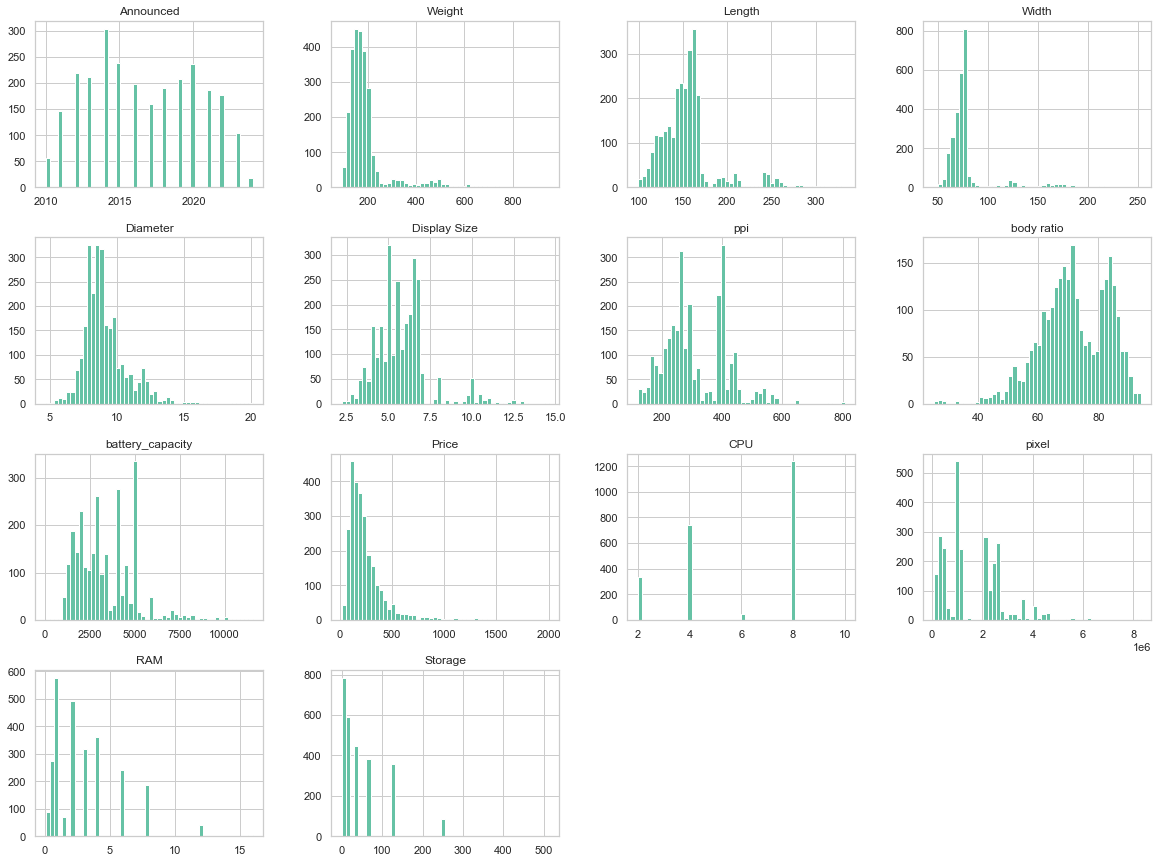

In [1455]:
# Histogram
data_num=data[[ 'Announced','Weight', 'Length', 'Width', 'Diameter','Display Size', 'ppi', 'body ratio', 'battery_capacity', 'Price', 'CPU',
       'pixel','RAM', 'Storage']]
data_num.hist(bins=50,figsize=(20,15))
plt.show()

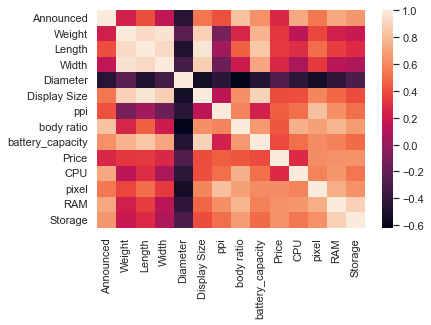

In [1456]:
# Heatmap
sns.heatmap(data_num.corr())
plt.show()

### Spliting Data into Test, Train and Validation Set

In [1457]:
data = data.drop(columns = ['SIM', 'Display Type', 'brand', 'Chipset', 'OS_version'])

data.loc[data.Status == 1, 'Status'] = 2

In [1458]:
train, temp, _, _ = train_test_split(data, data, test_size=0.3, random_state=random_state)

val, test, _, _ = train_test_split(temp, temp, test_size=0.5, random_state=random_state)

In [1459]:
## Removing outliers with zcscore

numeric_features = ['Weight', 'Length', 'Width', 'Diameter','Display Size', 'body ratio', 'battery_capacity', 'Price']

for feature in numeric_features:
    train[feature] = drop_outliers_Zscore(train, feature)
    # train = train.loc[~train[feature].isna(),:] 

# train['Price'] = drop_outliers_Zscore(train, 'Price') 
train = train.loc[~train['Price'].isna(),:]

print(train.shape)

(1813, 72)


##### Fill Nans of All Sets

In [1460]:
## Finding NA Features

print('train missing values:', train.columns[train.isna().sum() > 0])
print('validation missing values:', val.columns[val.isna().sum() > 0])
print('test missing values:', test.columns[test.isna().sum() > 0])

train missing values: Index(['Weight', 'Length', 'Width', 'Diameter', 'Display Size', 'body ratio',
       'battery_capacity', 'CPU', 'Bluetooth', 'GPU', 'Card slot'],
      dtype='object')
validation missing values: Index(['CPU', 'Bluetooth', 'GPU', 'Card slot'], dtype='object')
test missing values: Index(['CPU', 'Bluetooth', 'GPU', 'Card slot'], dtype='object')


In [1461]:
# ## NAs in Train Set

fill_with_year = ['Weight', 'Length', 'Width', 'Diameter', 'Display Size', 'ppi',
       'body ratio', 'battery_capacity', 'CPU', 'pixel', 'Bluetooth', 'Card slot', 'RAM', 'Storage', 'Price', 'GPU']

for feature in fill_with_year:
    most_repeated_items = train.groupby(['Announced'])[feature].apply(lambda x: x.value_counts().idxmax())
    for year, f in most_repeated_items.items():
        train.loc[train['Announced'] == year, feature] = train.loc[train['Announced'] == year, feature].fillna(f)
        test.loc[test['Announced'] == year, feature] = test.loc[test['Announced'] == year, feature].fillna(f)
        val.loc[val['Announced'] == year, feature] = val.loc[val['Announced'] == year, feature].fillna(f)

In [1462]:
print('train missing values:', train.columns[train.isna().sum() > 0])
print('validation missing values:', val.columns[val.isna().sum() > 0])
print('test missing values:', test.columns[test.isna().sum() > 0])

train missing values: Index([], dtype='object')
validation missing values: Index([], dtype='object')
test missing values: Index([], dtype='object')


In [1463]:
## Encoding Data

# ratio - OS_version -- > preprocess (changing to numeric - no encoding)
# Status - OS (as OS_types) -- > encode in preprocess
# SIM, Display Type, brand, OS -- > onehot encode in preprocess 
# Drop WLAN --> 1851 wi-fi and 4 no! --> too unbalanced --> dropped in process
# Bluetooth --> changing to float in preprocess
# 'Chipset','Card slot' -- > reducing number of unique values in preprocess 
# ==> reducing number of features (columns)

remaining_encoding_columns = ['Card slot', 'GPU']

# 1-Hot Encoding for remaining columns

# Train Set
encoder = ce.OneHotEncoder(use_cat_names=True)
data_1hot_train = encoder.fit_transform(train[remaining_encoding_columns])
train=pd.concat([train, data_1hot_train],axis=1).drop(remaining_encoding_columns,axis=1)

# Validation Set
data_1hot_val = encoder.transform(val[remaining_encoding_columns])
val=pd.concat([val, data_1hot_val],axis=1).drop(remaining_encoding_columns,axis=1)

# Test Set
data_1hot_test = encoder.transform(test[remaining_encoding_columns])
test=pd.concat([test, data_1hot_test],axis=1).drop(remaining_encoding_columns,axis=1)

In [1464]:
print(train.shape)

(1813, 82)


#### Handling Redundant and Zero valued Columns

In [1465]:
train.columns[(train == 0).all(axis=0)]

Index(['ambient sensor'], dtype='object')

In [1466]:
# drop features with all zero values
non_zero_cols = train.columns[(train != 0).any(axis=0)]

train = train.loc[:, non_zero_cols]
test = test.loc[:, non_zero_cols]
val = val.loc[:, non_zero_cols]

print(train.shape)

(1813, 81)


In [1467]:
# Features with low variance
# VarianceThreshold

vt = VarianceThreshold(threshold=0.001)
vt.fit(train)
vt_selected_features = vt.get_support()
print('Low Variance Features:', train.columns[~vt_selected_features])

Low Variance Features: Index(['2G', 'Hand-ID', 'UV'], dtype='object')


In [1468]:
train.loc[:, train.columns[~vt_selected_features]].sum()

2G         1813
Hand-ID       1
UV            1
dtype: int64

In [1469]:
vt_selected_features = train.columns[vt_selected_features]

train = train[vt_selected_features]
val = val[vt_selected_features]
test = test[vt_selected_features]

print(train.shape)

(1813, 78)


In [1470]:
#### Scaling

scaler = MinMaxScaler()

train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
val = pd.DataFrame(scaler.transform(val), columns=val.columns)
test = pd.DataFrame(scaler.transform(test), columns=test.columns)

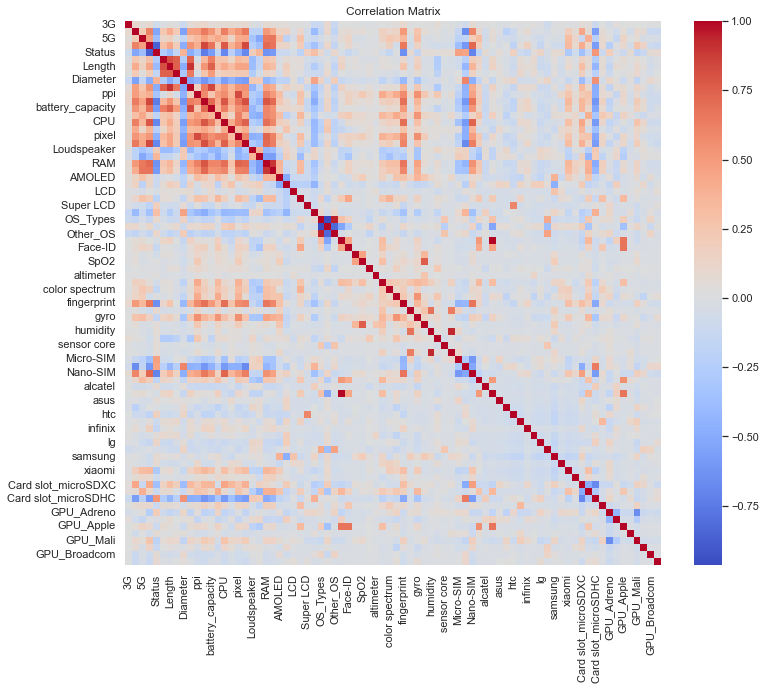

In [1471]:
## Finding Features Afecting Eachother
# Compute the correlation matrix
corr_matrix = train.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [1472]:
corr_matrix = train.corr().abs()

mask = (corr_matrix >= 0.8) & (corr_matrix <= 1.0)

redundant_features = set()
redundant_tuples = []

for feature in range(len(corr_matrix.columns)):
    for col in range(feature):
        if mask.iloc[feature, col]:
            redundant_features.add(corr_matrix.columns[feature])
            # redundant_features.append(corr_matrix.columns[col])
            redundant_tuples.append((corr_matrix.columns[feature], corr_matrix.columns[col]))


# Print the list of redundant features removed
print("Redundant features:", redundant_features)
redundant_tuples

Redundant features: {'body ratio', 'Storage', 'Bluetooth', 'thermometer', 'Status', 'Length', 'Display Size', 'Other_OS', 'apple', 'pixel', 'Android', 'battery_capacity'}


[('Status', 'Announced'),
 ('Length', 'Weight'),
 ('Display Size', 'Length'),
 ('body ratio', 'Announced'),
 ('battery_capacity', 'Display Size'),
 ('pixel', 'ppi'),
 ('Bluetooth', 'Announced'),
 ('Bluetooth', 'body ratio'),
 ('Storage', 'RAM'),
 ('Android', 'OS_Types'),
 ('Other_OS', 'OS_Types'),
 ('Other_OS', 'Android'),
 ('thermometer', 'humidity'),
 ('apple', 'iOS')]

In [1473]:
# redundant_features = ['Bluetooth', 'RAM', 'Chipset_Apple', 
#                       'Width', 'pixel', 'Display Size', 'body ratio', 'Nano-SIM', 'Length',
#                       'apple', 'Announced', 'Other_OS', 'Android']
redundant_features = ['Bluetooth', 'Storage',
                      'Display Size', 'Length', 'Status', 'body ratio',
                      'iOS', 'Android', 'Other_OS',
                      'pixel', 'thermometer']

train = train.drop(columns=redundant_features)
test = test.drop(columns=redundant_features)
val =val.drop(columns=redundant_features)

In [1474]:
corr_matrix = train.corr().abs()

mask = (corr_matrix >= 0.8) & (corr_matrix <= 1.0)

redundant_features = set()
redundant_tuples = []

for feature in range(len(corr_matrix.columns)):
    for col in range(feature):
        if mask.iloc[feature, col]:
            redundant_features.add(corr_matrix.columns[feature])
            # redundant_features.append(corr_matrix.columns[col])
            redundant_tuples.append((corr_matrix.columns[feature], corr_matrix.columns[col]))


# Print the list of redundant features removed
print("Redundant features:", redundant_features)
redundant_tuples

Redundant features: set()


[]

## Training Part

### Q2: Classification Part: Estimating OS type

In [1529]:
X_train = train.copy()
X_test = test.copy()
X_val = val.copy()

y_train = X_train['OS_Types'].astype(str)
X_train.drop(['OS_Types'], axis =1, inplace=True)

y_test = X_test['OS_Types'].astype(str)
X_test.drop(['OS_Types'], axis =1, inplace=True)

y_val = X_val['OS_Types'].astype(str)
X_val.drop(['OS_Types'], axis =1, inplace=True)

#### Handling Redundant Features

In [1530]:
## Removing Leaky Features
leaky_features = ['Android', 'Other_OS', 'iOS', 'OS_version', 
                  'apple',
                  'alcatel', 'asus', 'blu', 'htc',
                  'huawei', 'infinix', 'lenovo', 'lg', 'nokia', 'samsung', 'sony',
                  'xiaomi', 'zte']
leaky_features += ['GPU_Adreno',
       'GPU_PowerVR', 'GPU_Apple', 'GPU_Other_GPU', 'GPU_Mali', 'GPU_IMG8322',
       'GPU_Broadcom', 'GPU_ULP']

for feature in leaky_features:
    if feature in X_train.columns:
        X_train.drop(feature, axis=1, inplace=True)
        X_test.drop(feature, axis=1, inplace=True)
        X_val.drop(feature, axis=1, inplace=True)


In [1531]:
## Oversampling

oversampler = RandomOverSampler(sampling_strategy='auto', random_state=random_state)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

# smote = SMOTE()
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

X_train.shape

(5022, 44)

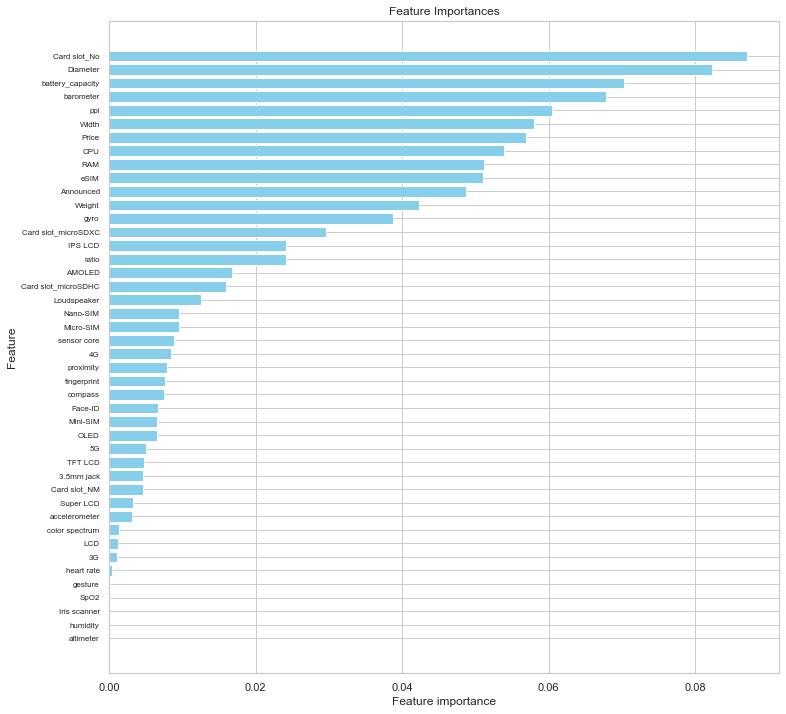

In [1532]:
# Initialize the classifier (you can use any other classifier)
clf = RandomForestClassifier()

# Fit the classifier to your data
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Get indices of features sorted by importance
indices = np.argsort(importances)[::-1]

# Sort feature importances and feature indices
importances_sorted = importances[indices]
feature_names_sorted = [X_train.columns[i] for i in indices]

# Plot the feature importances with smaller font size
plt.figure(figsize=(12, 12))
plt.barh(range(X_train.shape[1]), importances_sorted, color="skyblue")
plt.yticks(range(X_train.shape[1]), feature_names_sorted, fontsize=8)  # Set font size to 8
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()



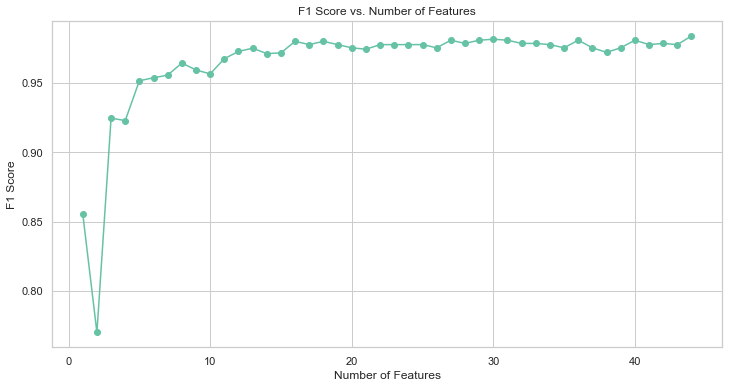

Best number of features: 44
Best feature names: ['Card slot_No', 'Diameter', 'battery_capacity', 'barometer', 'ppi', 'Width', 'Price', 'CPU', 'RAM', 'eSIM', 'Announced', 'Weight', 'gyro', 'Card slot_microSDXC', 'IPS LCD', 'ratio', 'AMOLED', 'Card slot_microSDHC', 'Loudspeaker', 'Nano-SIM', 'Micro-SIM', 'sensor core', '4G', 'proximity', 'fingerprint', 'compass', 'Face-ID', 'Mini-SIM', 'OLED', '5G', 'TFT LCD', '3.5mm jack', 'Card slot_NM', 'Super LCD', 'accelerometer', 'color spectrum', 'LCD', '3G', 'heart rate', 'gesture', 'SpO2', 'Iris scanner', 'humidity', 'altimeter']


In [1533]:
def get_f1_score(X_train, y_train, X_val, y_val, features):
    clf = RandomForestClassifier(random_state=random_state)
    clf.fit(X_train[features], y_train)
    y_pred = clf.predict(X_val[features])
    return f1_score(y_val, y_pred, average='weighted')

max_features = X_train.shape[1]
f1_scores = []
best_num_features = None
best_feature_names = None
best_f1_score = 0.0

for n in range(1, max_features + 1):
    feature_subset = feature_names_sorted[:n]
    f1 = get_f1_score(X_train, y_train, X_val, y_val, feature_subset)
    f1_scores.append(f1)
    if f1 > best_f1_score:
        best_f1_score = f1
        best_num_features = n
        best_feature_names = feature_subset

plt.figure(figsize=(12, 6))
plt.plot(range(1, max_features + 1), f1_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Number of Features')
plt.grid(True)
plt.show()

print("Best number of features:", best_num_features)
print("Best feature names:", best_feature_names)


In [1534]:
feature_names = best_feature_names

X_train = X_train[feature_names]
X_val = X_val[feature_names]
X_test = X_test[feature_names]

#### Part 1

##### Selecting Model and Parameters

In [1535]:
# Define classification models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=random_state),
    'Random Forest': RandomForestClassifier(random_state = random_state),
    'SVM': SVC(random_state = random_state),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
    }

# Define parameter grids for each model
param_grids = {
    'Decision Tree': {
        'max_depth': [10, 20, 30],
        'min_samples_leaf': [10, 20, 30]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {},
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'Naive Bayes': {}
}

# Perform grid search for each model
best_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")


Training Decision Tree...
Best parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 10}
Training Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Training SVM...
Best parameters for SVM: {}
Training KNN...
Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Training Naive Bayes...
Best parameters for Naive Bayes: {}


##### Model Evaluation on Train and Validation Set

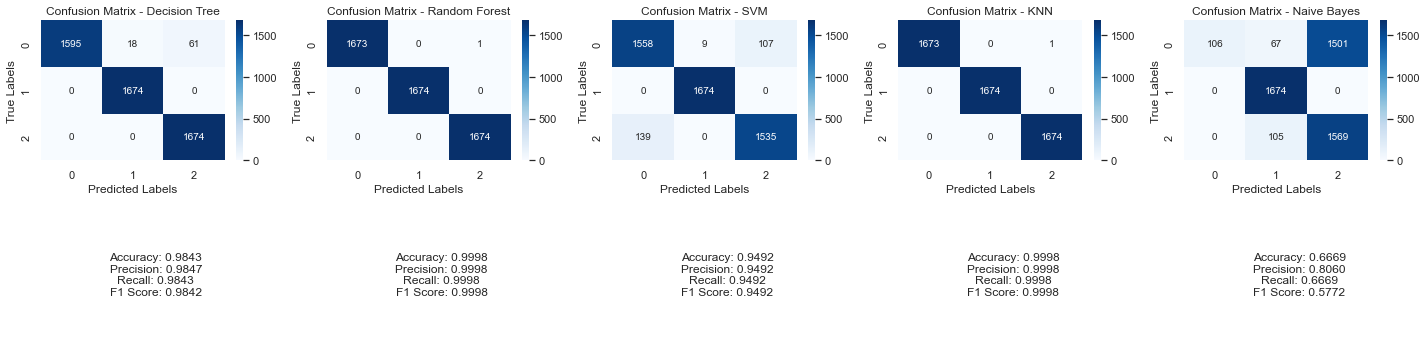

In [1536]:
## Train Set

# Define the number of rows and columns for the subplot grid
num_rows = 2
num_cols = len(best_models)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5))

# Make predictions on the validation set using the best models
predictions = {}
for name, model in best_models.items():
    predictions[name] = model.predict(X_train)

# Evaluate each model's performance and plot confusion matrix
for i, (name, y_pred) in enumerate(predictions.items()):
    # Compute evaluation metrics
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average='weighted')
    recall = recall_score(y_train, y_pred, average='weighted')
    f1 = f1_score(y_train, y_pred, average='weighted')
    
    # Plot confusion matrix
    sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='g', cmap='Blues', ax=axs[0, i])
    axs[0, i].set_title(f'Confusion Matrix - {name}')
    axs[0, i].set_xlabel('Predicted Labels')
    axs[0, i].set_ylabel('True Labels')
    
    # Print evaluation results
    axs[1, i].text(0.5, 0.5, f"Accuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}", 
                   horizontalalignment='center', verticalalignment='center', fontsize=12)
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()



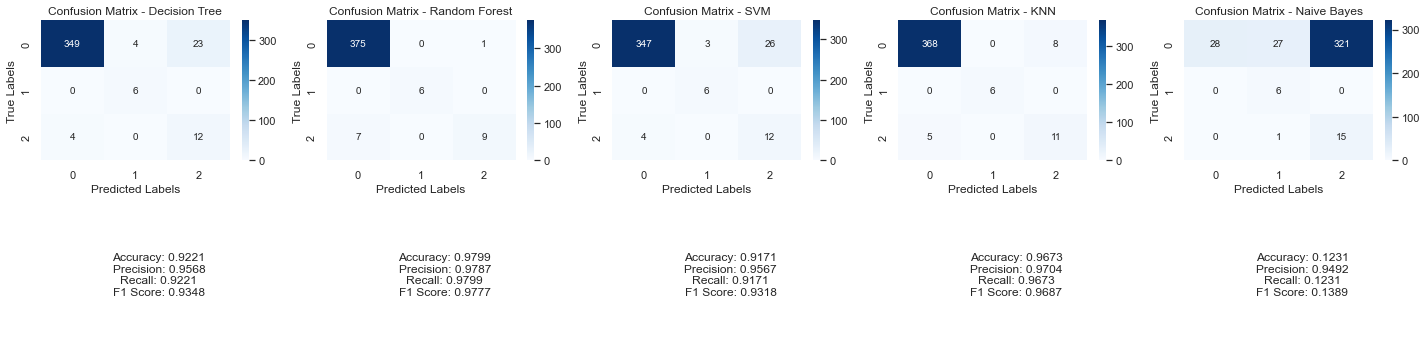

In [1537]:
# Validation Set

# Define the number of rows and columns for the subplot grid
num_rows = 2
num_cols = len(best_models)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5))

# Make predictions on the validation set using the best models
predictions = {}
for name, model in best_models.items():
    predictions[name] = model.predict(X_val)

# Evaluate each model's performance and plot confusion matrix
for i, (name, y_pred) in enumerate(predictions.items()):
    # Compute evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    
    # Plot confusion matrix
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='g', cmap='Blues', ax=axs[0, i])
    axs[0, i].set_title(f'Confusion Matrix - {name}')
    axs[0, i].set_xlabel('Predicted Labels')
    axs[0, i].set_ylabel('True Labels')
    
    # Print evaluation results
    axs[1, i].text(0.5, 0.5, f"Accuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}", 
                   horizontalalignment='center', verticalalignment='center', fontsize=12)
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()



#### Part 2

In [1538]:
# Define the new bins and labels
bins_new = [-np.inf, X_train['battery_capacity'].quantile(0.25), X_train['battery_capacity'].quantile(0.75), np.inf]
labels_new = [1, 2, 3]

# Transform the 'battery_capacity' column in the training set
X_train['battery_capacity'] = pd.cut(X_train['battery_capacity'], bins=bins_new, labels=labels_new, right=False)

# Transform the 'battery_capacity' column in the validation set using the same bins and labels
X_val['battery_capacity'] = pd.cut(X_val['battery_capacity'], bins=bins_new, labels=labels_new, right=False)

X_train['battery_capacity'] = scaler.fit_transform(X_train['battery_capacity'].values.reshape(-1, 1))
X_val['battery_capacity'] = scaler.fit_transform(X_val['battery_capacity'].values.reshape(-1, 1))

##### Selecting Model and Parameters

In [1539]:
# Define classification models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=random_state),
    'Random Forest': RandomForestClassifier(random_state = random_state),
    'SVM': SVC(random_state = random_state),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Define parameter grids for each model
param_grids = {
    'Decision Tree': {
        'max_depth': [10, 20, 30],
        'min_samples_leaf': [10, 20, 30]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {},
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'Naive Bayes': {}
}

# Perform grid search for each model
best_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")


Training Decision Tree...
Best parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 10}
Training Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Training SVM...
Best parameters for SVM: {}
Training KNN...
Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Training Naive Bayes...
Best parameters for Naive Bayes: {}


##### Model Evaluation on Validation Set

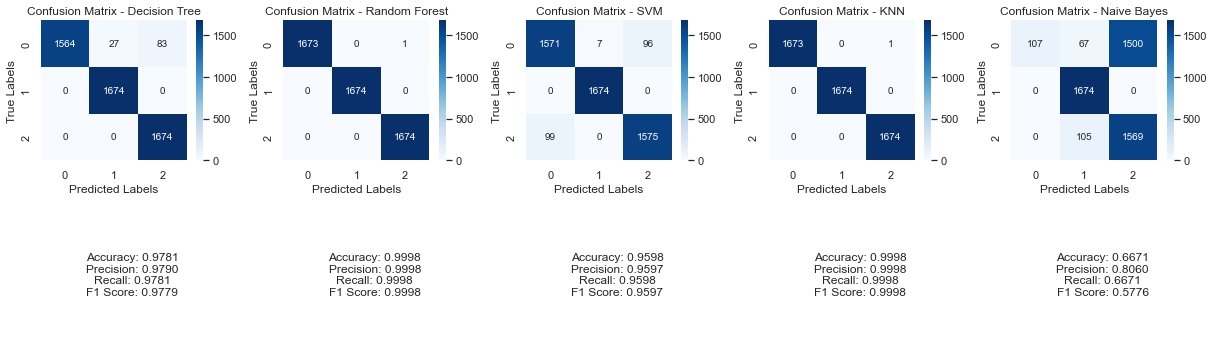

In [1540]:
## Train Set

# Define the number of rows and columns for the subplot grid
num_rows = 2
num_cols = len(best_models)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(17, 5))

# Make predictions on the validation set using the best models
predictions = {}
for name, model in best_models.items():
    predictions[name] = model.predict(X_train)

# Evaluate each model's performance and plot confusion matrix
for i, (name, y_pred) in enumerate(predictions.items()):
    # Compute evaluation metrics
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average='weighted')
    recall = recall_score(y_train, y_pred, average='weighted')
    f1 = f1_score(y_train, y_pred, average='weighted')
    
    # Plot confusion matrix
    sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='g', cmap='Blues', ax=axs[0, i])
    axs[0, i].set_title(f'Confusion Matrix - {name}')
    axs[0, i].set_xlabel('Predicted Labels')
    axs[0, i].set_ylabel('True Labels')
    
    # Print evaluation results
    axs[1, i].text(0.5, 0.5, f"Accuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}", 
                   horizontalalignment='center', verticalalignment='center', fontsize=12)
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()



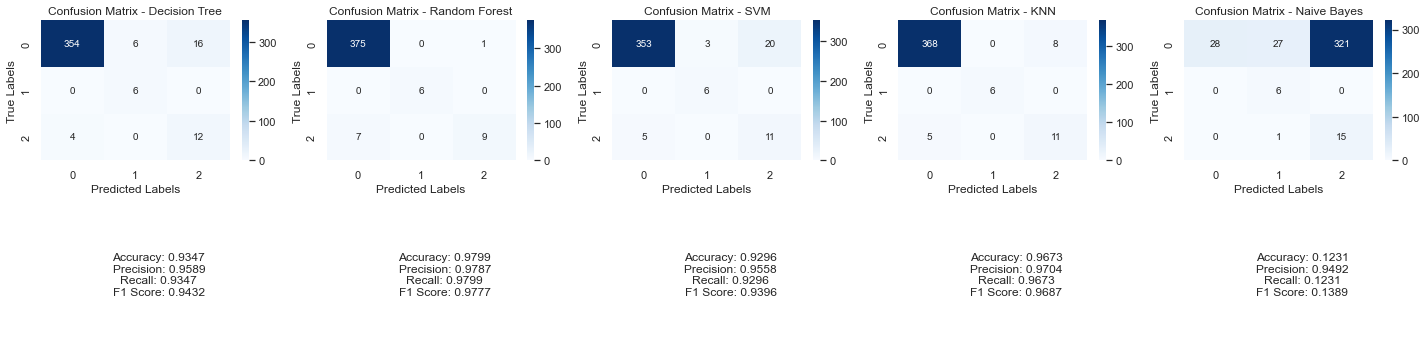

In [1541]:
## Validation Set

# Define the number of rows and columns for the subplot grid
num_rows = 2
num_cols = len(best_models)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5))

# Make predictions on the validation set using the best models
predictions = {}
for name, model in best_models.items():
    predictions[name] = model.predict(X_val)

# Evaluate each model's performance and plot confusion matrix
for i, (name, y_pred) in enumerate(predictions.items()):
    # Compute evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    
    # Plot confusion matrix
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='g', cmap='Blues', ax=axs[0, i])
    axs[0, i].set_title(f'Confusion Matrix - {name}')
    axs[0, i].set_xlabel('Predicted Labels')
    axs[0, i].set_ylabel('True Labels')
    
    # Print evaluation results
    axs[1, i].text(0.5, 0.5, f"Accuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}", 
                   horizontalalignment='center', verticalalignment='center', fontsize=12)
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()



#### Model Evaluation on Test set

Accuracy: 0.9724
Precision: 0.9711
Recall: 0.9724
F1 Score: 0.9691


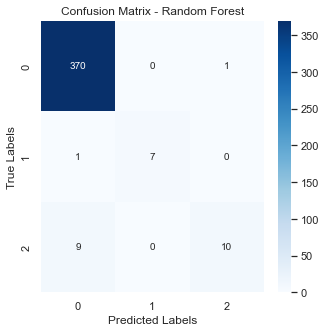

In [1542]:
# Transform the 'battery_capacity' column in the test set
# X_test['battery_capacity'] = scaler.fit_transform(X_test['battery_capacity'].values.reshape(-1, 1))

name = 'Random Forest'

model = best_models[name]

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

fig, axs = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues')
plt.title(f'Confusion Matrix - {name}')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

print(f"Accuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}")

plt.show()



In [1543]:
pd.concat([pd.Series(y_test, name = 'test'), pd.Series(y_pred, name='prediction')], axis = 1).to_csv('clf_result.csv', index = False)

### Q3: Regression Part: Estimating Price

In [1555]:
X_train = train.copy()
X_test = test.copy()
X_val = val.copy()

X_train.drop(columns=['OS_Types'], inplace=True)
X_test.drop(columns=['OS_Types'], inplace=True)
X_val.drop(columns=['OS_Types'], inplace=True)

y_train = X_train['Price']
X_train.drop(['Price'], axis =1, inplace=True)

y_test = X_test['Price']
X_test.drop(['Price'], axis =1, inplace=True)

y_val = X_val['Price']
X_val.drop(['Price'], axis =1, inplace=True)

X_train.shape

(1813, 65)

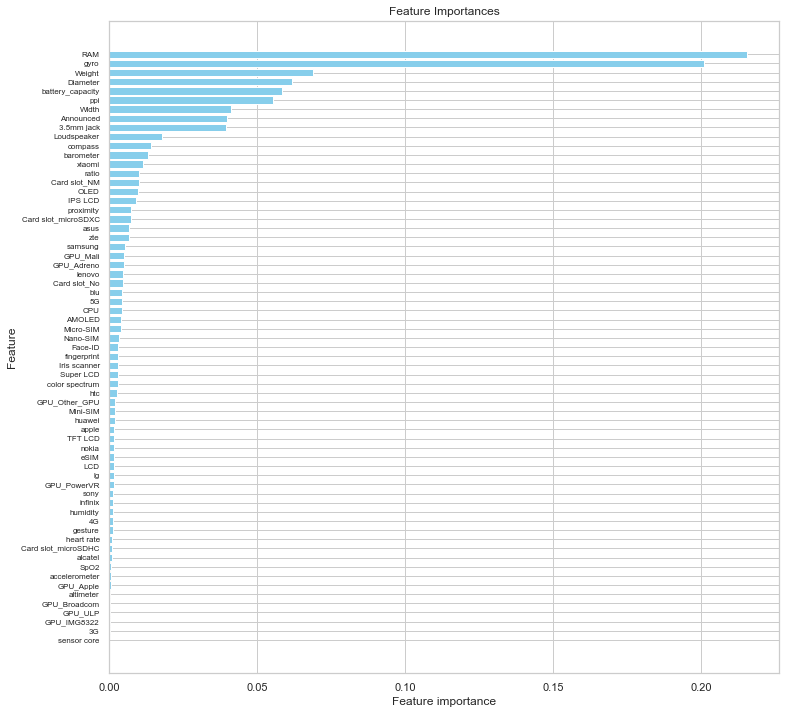

In [1556]:
# Initialize the regressor (you can use any other regressor)
reg = RandomForestRegressor(random_state=random_state)

# Fit the regressor to your data
reg.fit(X_train, y_train)

# Get feature importances
importances = reg.feature_importances_

# Get indices of features sorted by importance
indices = np.argsort(importances)[::-1]

# Sort feature importances and feature indices
importances_sorted = importances[indices]
rf_feature_names_sorted = [X_train.columns[i] for i in indices]

# Plot the feature importances with smaller font size
plt.figure(figsize=(12, 12))
plt.barh(range(X_train.shape[1]), importances_sorted, color="skyblue")
plt.yticks(range(X_train.shape[1]), rf_feature_names_sorted, fontsize=8)  # Set font size to 8
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


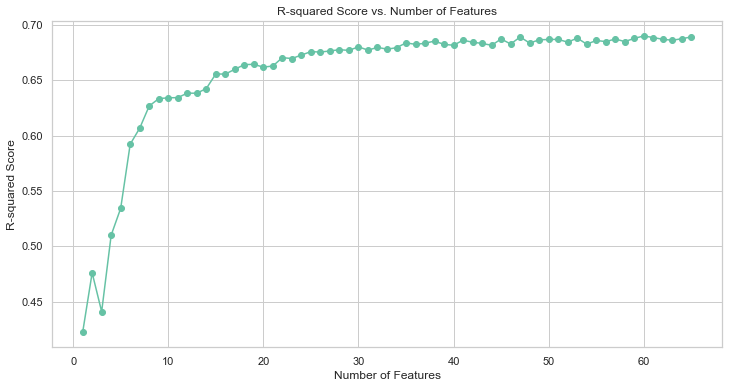

Best number of features: 60
Best feature names: ['RAM', 'gyro', 'Weight', 'Diameter', 'battery_capacity', 'ppi', 'Width', 'Announced', '3.5mm jack', 'Loudspeaker', 'compass', 'barometer', 'xiaomi', 'ratio', 'Card slot_NM', 'OLED', 'IPS LCD', 'proximity', 'Card slot_microSDXC', 'asus', 'zte', 'samsung', 'GPU_Mali', 'GPU_Adreno', 'lenovo', 'Card slot_No', 'blu', '5G', 'CPU', 'AMOLED', 'Micro-SIM', 'Nano-SIM', 'Face-ID', 'fingerprint', 'Iris scanner', 'Super LCD', 'color spectrum', 'htc', 'GPU_Other_GPU', 'Mini-SIM', 'huawei', 'apple', 'TFT LCD', 'nokia', 'eSIM', 'LCD', 'lg', 'GPU_PowerVR', 'sony', 'infinix', 'humidity', '4G', 'gesture', 'heart rate', 'Card slot_microSDHC', 'alcatel', 'SpO2', 'accelerometer', 'GPU_Apple', 'altimeter']
Best R2 Score: 0.6900838665735688


In [1557]:
def get_r2_score(X_train, y_train, X_val, y_val, features):
    reg = RandomForestRegressor(random_state=random_state)
    # reg = LinearRegression()
    reg.fit(X_train[features], y_train)
    y_pred = reg.predict(X_val[features])
    return r2_score(y_val, y_pred)

max_features = X_train.shape[1]
r2_scores = []
rf_best_num_features = None
rf_best_feature_names = None
best_r2_score = -float('inf')

for n in range(1, max_features + 1):
    feature_subset = rf_feature_names_sorted[:n]
    r2 = get_r2_score(X_train, y_train, X_val, y_val, feature_subset)
    r2_scores.append(r2)
    if r2 > best_r2_score:
        best_r2_score = r2
        rf_best_num_features = n
        rf_best_feature_names = feature_subset

plt.figure(figsize=(12, 6))
plt.plot(range(1, max_features + 1), r2_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('R-squared Score')
plt.title('R-squared Score vs. Number of Features')
plt.grid(True)
plt.show()

print("Best number of features:", rf_best_num_features)
print("Best feature names:", rf_best_feature_names)
print("Best R2 Score:", best_r2_score)


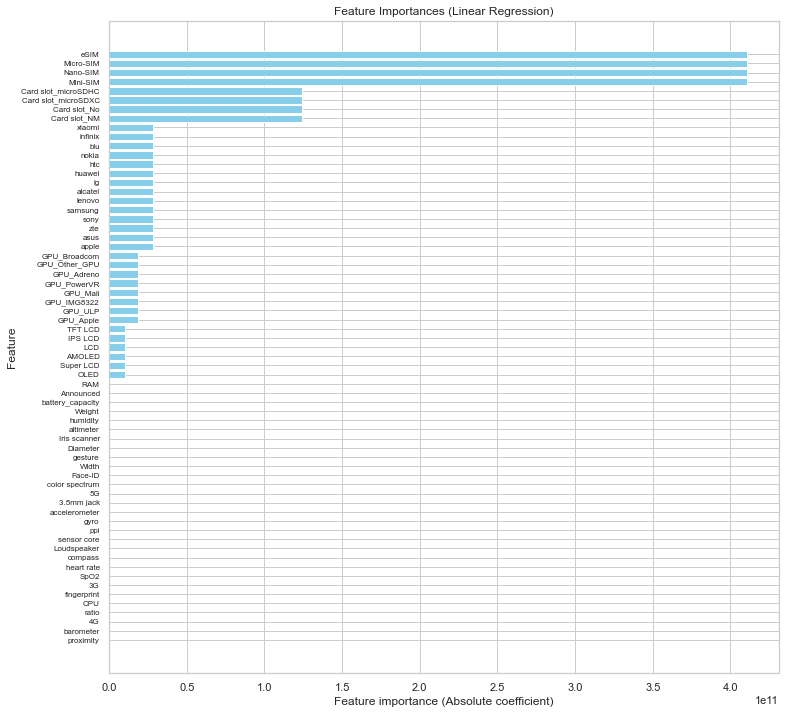

In [1558]:
# Initialize the regressor (Linear Regression)
reg = LinearRegression()

# Fit the regressor to your data
reg.fit(X_train, y_train)

# Get feature importances (absolute coefficients)
importances = np.abs(reg.coef_)

# Get indices of features sorted by importance
indices = np.argsort(importances)[::-1]

# Sort feature importances and feature indices
importances_sorted = importances[indices]
reg_feature_names_sorted = [X_train.columns[i] for i in indices]

# Plot the feature importances with smaller font size
plt.figure(figsize=(12, 12))
plt.barh(range(X_train.shape[1]), importances_sorted, color="skyblue")
plt.yticks(range(X_train.shape[1]), reg_feature_names_sorted, fontsize=8)  # Set font size to 8
plt.xlabel("Feature importance (Absolute coefficient)")
plt.ylabel("Feature")
plt.title("Feature Importances (Linear Regression)")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


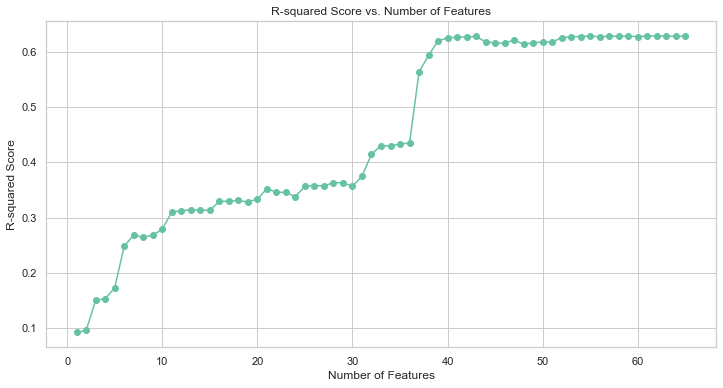

Best number of features: 62
Best feature names: ['eSIM', 'Micro-SIM', 'Nano-SIM', 'Mini-SIM', 'Card slot_microSDHC', 'Card slot_microSDXC', 'Card slot_No', 'Card slot_NM', 'xiaomi', 'infinix', 'blu', 'nokia', 'htc', 'huawei', 'lg', 'alcatel', 'lenovo', 'samsung', 'sony', 'zte', 'asus', 'apple', 'GPU_Broadcom', 'GPU_Other_GPU', 'GPU_Adreno', 'GPU_PowerVR', 'GPU_Mali', 'GPU_IMG8322', 'GPU_ULP', 'GPU_Apple', 'TFT LCD', 'IPS LCD', 'LCD', 'AMOLED', 'Super LCD', 'OLED', 'RAM', 'Announced', 'battery_capacity', 'Weight', 'humidity', 'altimeter', 'Iris scanner', 'Diameter', 'gesture', 'Width', 'Face-ID', 'color spectrum', '5G', '3.5mm jack', 'accelerometer', 'gyro', 'ppi', 'sensor core', 'Loudspeaker', 'compass', 'heart rate', 'SpO2', '3G', 'fingerprint', 'CPU', 'ratio']


In [1559]:
def get_r2_score(X_train, y_train, X_val, y_val, features):
    # reg = RandomForestRegressor(random_state=random_state)
    reg = LinearRegression()
    reg.fit(X_train[features], y_train)
    y_pred = reg.predict(X_val[features])
    return r2_score(y_val, y_pred)

max_features = X_train.shape[1]
r2_scores = []
reg_best_num_features = None
reg_best_feature_names = None
best_r2_score = -float('inf')

for n in range(1, max_features + 1):
    feature_subset = reg_feature_names_sorted[:n]
    r2 = get_r2_score(X_train, y_train, X_val, y_val, feature_subset)
    r2_scores.append(r2)
    if r2 > best_r2_score:
        best_r2_score = r2
        reg_best_num_features = n
        reg_best_feature_names = feature_subset

plt.figure(figsize=(12, 6))
plt.plot(range(1, max_features + 1), r2_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('R-squared Score')
plt.title('R-squared Score vs. Number of Features')
plt.grid(True)
plt.show()

print("Best number of features:", reg_best_num_features)
print("Best feature names:", reg_best_feature_names)


#### Selecting Model and Parameters

In [1560]:
selected_features = rf_best_feature_names

In [1561]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=random_state),
    'Random Forest': RandomForestRegressor(random_state=random_state),
    'Gradient Boosting': GradientBoostingRegressor(random_state=random_state)
}

# Define parameter grids for each model
param_grids = {
    'Linear Regression':{
        'fit_intercept':[True,False],
        'normalize': [True,False]
    },
    'Decision Tree': {
        'max_depth': [10, 20, 30], 
        'min_samples_leaf':[10, 20, 30]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [200, 300, 400],
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 5, 7]
    }
}

# Perform grid search for each model
best_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='r2')
    grid_search.fit(X_train[selected_features], y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

Training Linear Regression...
Best parameters for Linear Regression: {'fit_intercept': True, 'normalize': True}
Training Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 10}
Training Random Forest...
Best parameters for Random Forest: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Training Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


#### Model Evaluation

In [1562]:
# Define the number of models
num_models = len(best_models)

# Initialize a dictionary to store evaluation results
evaluation_results = {'Model': [], 'Set': [], 'MAE': [], 'MSE': [], 'R-squared': []}

# Evaluation on Validation
for name, model in best_models.items():
    y_pred_val = model.predict(X_val[selected_features])
    mae_val = mean_absolute_error(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    r2_val = r2_score(y_val, y_pred_val)

    # Store validation set evaluation results
    evaluation_results['Model'].append(name)
    evaluation_results['Set'].append('Validation')
    evaluation_results['MAE'].append(mae_val)
    evaluation_results['MSE'].append(mse_val)
    evaluation_results['R-squared'].append(r2_val)

# Evaluation on Train
for name, model in best_models.items():
    y_pred_train = model.predict(X_train[selected_features])
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    # Store training set evaluation results
    evaluation_results['Model'].append(name)
    evaluation_results['Set'].append('Train')
    evaluation_results['MAE'].append(mae_train)
    evaluation_results['MSE'].append(mse_train)
    evaluation_results['R-squared'].append(r2_train)

# Convert the dictionary to a dataframe
evaluation_df = pd.DataFrame(evaluation_results)

# Display the dataframe
display(evaluation_df)

,Model,Set,MAE,MSE,R-squared
0,Linear Regression,Validation,0.076237,0.017148,0.629235
1,Decision Tree,Validation,0.079943,0.018155,0.607443
2,Random Forest,Validation,0.064613,0.014547,0.685468
3,Gradient Boosting,Validation,0.068136,0.014564,0.685093
4,Linear Regression,Train,0.070813,0.010063,0.651451
5,Decision Tree,Train,0.060331,0.007493,0.740463
6,Random Forest,Train,0.024559,0.001304,0.954827
7,Gradient Boosting,Train,0.047778,0.004221,0.853798


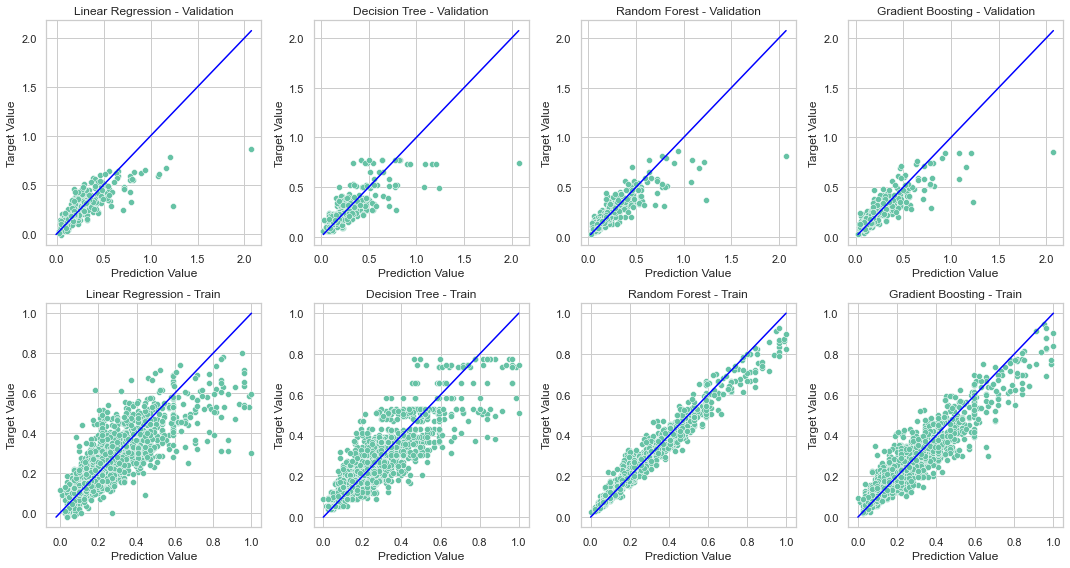

In [1563]:
# Define the number of models
num_models = len(best_models)

# Create subplots
fig, axs = plt.subplots(2, num_models, figsize=(15, 8))

# Evaluation on Validation
for i, (name, model) in enumerate(best_models.items()):
    y_pred = model.predict(X_val[selected_features])

    sns.scatterplot(y_val, y_pred, ax=axs[0, i])
    axs[0, i].set_title(f'{name} - Validation')
    axs[0, i].set_xlabel('Prediction Value')
    axs[0, i].set_ylabel('Target Value')
    axs[0, i].grid(True)
    
    p1 = max(max(y_pred), max(y_val))
    p2 = min(min(y_pred), min(y_val))
    axs[0, i].plot([p1, p2], [p1, p2], 'b-')

# Evaluation on Train
for i, (name, model) in enumerate(best_models.items()):
    y_pred = model.predict(X_train[selected_features])

    sns.scatterplot(y_train, y_pred, ax=axs[1, i])
    axs[1, i].set_title(f'{name} - Train')
    axs[1, i].set_xlabel('Prediction Value')
    axs[1, i].set_ylabel('Target Value')
    axs[1, i].grid(True)
    
    p1 = max(max(y_pred), max(y_train))
    p2 = min(min(y_pred), min(y_train))
    axs[1, i].plot([p1, p2], [p1, p2], 'b-')

plt.tight_layout()
plt.show()



#### Model Evaluation on Test set

In [1564]:
selected_model = list(best_models.items())[-1][1]

y_pred = selected_model.predict(X_test[selected_features])

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"{name} Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", r2)

Gradient Boosting Metrics:
MAE: 0.08325813332994016
MSE: 0.01998023804201738
R-squared: 0.6573200870456393


In [1565]:
pd.concat([pd.Series(y_test, name = 'test'), pd.Series(y_pred, name='prediction')], axis = 1).to_csv('reg_result.csv', index = False)